<a href="https://colab.research.google.com/github/lawchris96/portfolio/blob/main/Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/lawchris96/datascienceclass/main/customer%20preference%20cafe.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       40 non-null     object
 1   ice cream  40 non-null     int64 
 2   banana     40 non-null     int64 
 3   coffee     40 non-null     int64 
 4   tea        40 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.7+ KB


In [11]:
len(df)

40

In [12]:
df.isnull().sum()

name         0
ice cream    0
banana       0
coffee       0
tea          0
dtype: int64

In [13]:
# Creating a new record for 'Me'

df_me = {'name': 'Me',
         'ice cream': 3,
         'banana': 8}

df2 = df.append(df_me, ignore_index=True)
df2.tail()

,name,ice cream,banana,coffee,tea
36,Marcus,8,5,9.0,3.0
37,dyana,8,6,6.0,4.0
38,Bee,10,7,4.0,3.0
39,SY,7,5,9.0,9.0
40,Me,3,8,NaN,NaN


In [14]:
# Finding the similarity scores between 'ice cream' and 'banana'

features = ['ice cream', 'banana']
cosims = cosine_similarity(df2[features])

print(cosims)

[[1.         0.87294348 0.99810023 ... 0.99995465 1.         0.82995118]
 [0.87294348 1.         0.90134031 ... 0.8775496  0.87294348 0.45237614]
 [0.99810023 0.90134031 1.         ... 0.99864171 0.99810023 0.79400555]
 ...
 [0.99995465 0.8775496  0.99864171 ... 1.         0.99995465 0.82460106]
 [1.         0.87294348 0.99810023 ... 0.99995465 1.         0.82995118]
 [0.82995118 0.45237614 0.79400555 ... 0.82460106 0.82995118 1.        ]]


In [15]:
df.head()

,name,ice cream,banana,coffee,tea
0,Johann,7,5,4,2
1,Zhi Xuen,9,1,1,5
2,Vignesh,8,5,4,8
3,jaden,10,8,5,7
4,John Tan,7,3,8,7


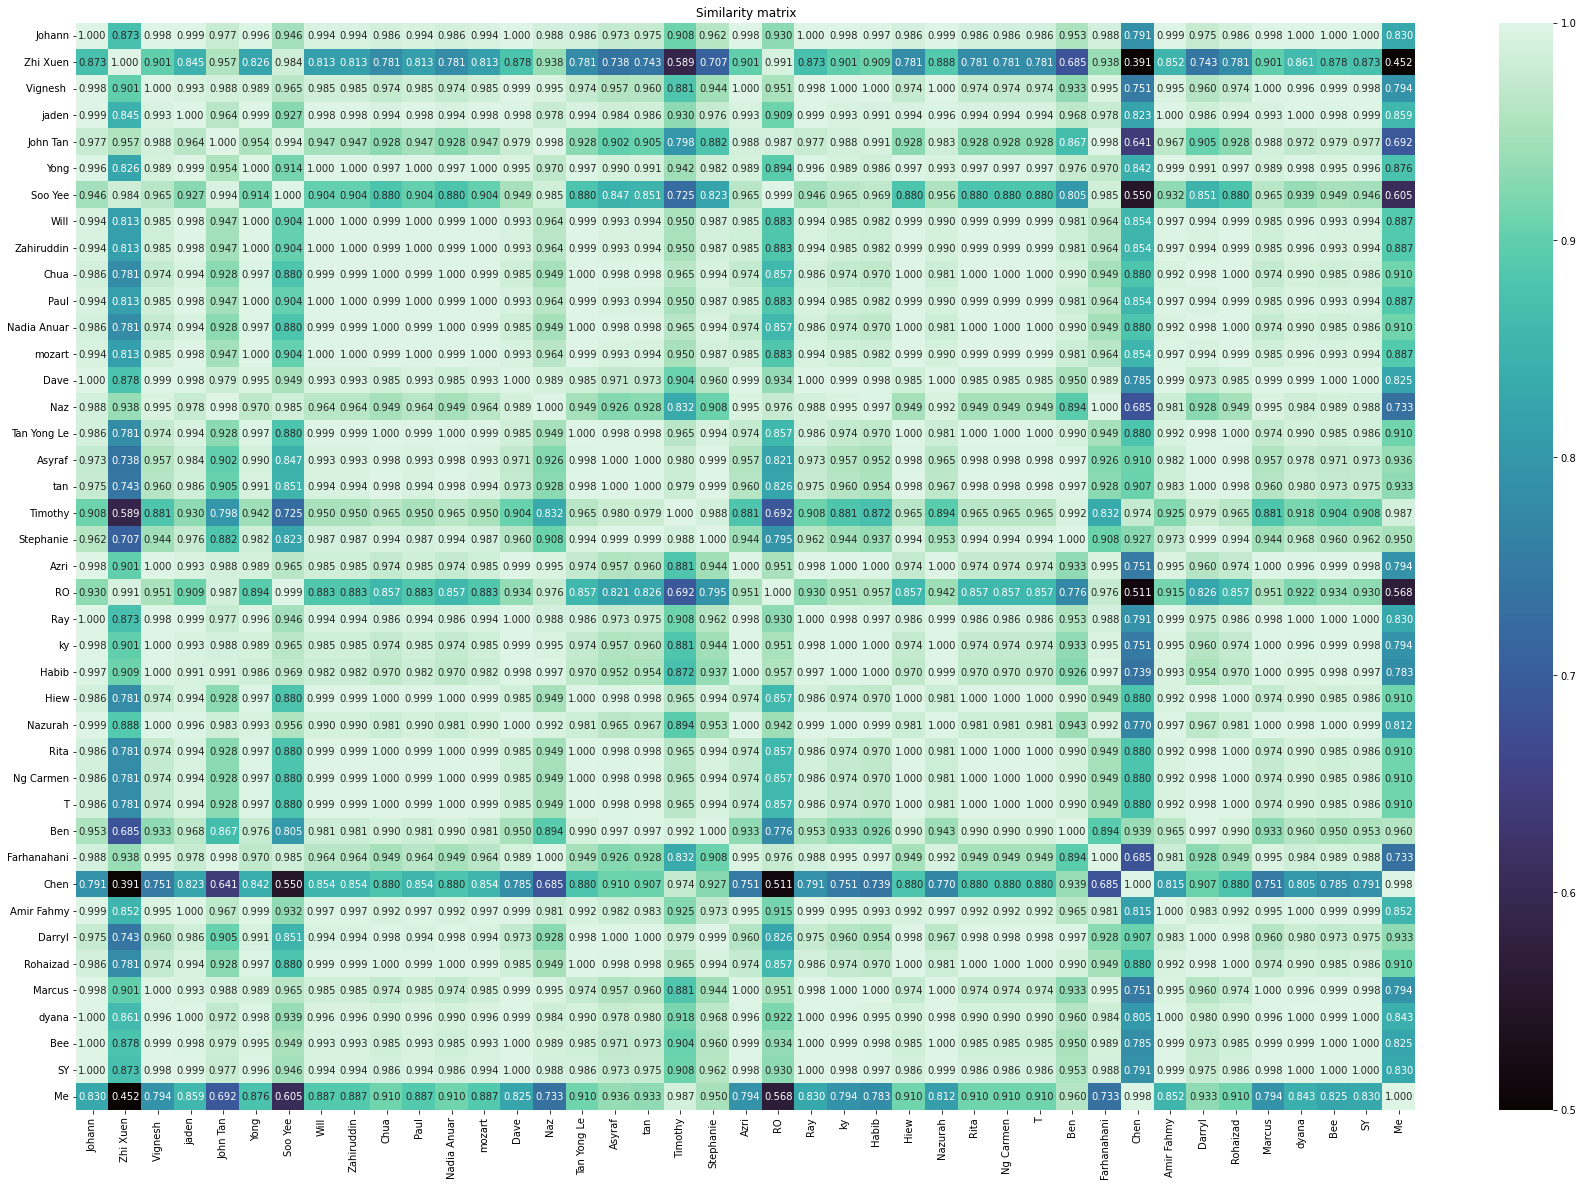

In [16]:
plt.figure(figsize=(30,20))
sns.heatmap(cosims, cmap='mako', vmax=1, vmin=0.5, annot=True, 
            xticklabels=df2['name'], yticklabels=df2['name'], fmt='.3f')

plt.title('Similarity matrix')
plt.show()

In [17]:
# Get the similarity values of 'Me'

me_values = cosims[-1]
print(me_values)

[0.82995118 0.45237614 0.79400555 0.85910154 0.6915715  0.87594774
 0.60536747 0.8873592  0.8873592  0.91036648 0.8873592  0.91036648
 0.8873592  0.82460106 0.73279349 0.91036648 0.93587592 0.93309487
 0.9871674  0.95049533 0.79400555 0.56773296 0.82995118 0.79400555
 0.78282325 0.91036648 0.81153434 0.91036648 0.91036648 0.91036648
 0.95973741 0.73279349 0.99773528 0.85201058 0.93309487 0.91036648
 0.79400555 0.84269626 0.82460106 0.82995118 1.        ]


In [18]:
# Finding the Average Weighted Rating

target = ['coffee', 'tea']
df_pred = pd.DataFrame(columns=target, index=range(len(df))) 


# Range is length of df (excluding the newly added 'Me' record) which is 40

for i in range(len(df)):
  df_pred.loc[i].coffee = df['coffee'].loc[i] * me_values[i]
  df_pred.loc[i].tea = df['tea'].loc[i] * me_values[i]

df_pred

,coffee,tea
0,3.319805,1.659902
1,0.452376,2.261881
2,3.176022,6.352044
3,4.295508,6.013711
4,5.532572,4.841
5,1.751895,7.007582
6,0.605367,2.42147
7,5.324155,6.211514
8,6.211514,6.211514
9,0.910366,5.462199


In [19]:
# Item recommendation for 'Me'

print('Coffee: ', round(df_pred['coffee'].mean(), 4))
print('Tea: ', round(df_pred['tea'].mean(), 4))

Coffee:  5.0093
Tea:  5.4082


In [20]:
# For comparison purposes

df[df['banana'] > df['ice cream']]

,name,ice cream,banana,coffee,tea
16,Asyraf,7,8,3,8
17,tan,8,9,4,6
18,Timothy,4,7,9,2
19,Stephanie,8,10,10,8
30,Ben,6,8,8,7
32,Chen,3,10,6,8
34,Darryl,8,9,3,7
